# Conhecendo e trabalhando com os dados de Potência 

## Objetivos: 
    -> Criar uma cópia DataFrame, utilizando a formatação Datetime (1) ok!
    -> Armazenar a potência máxima dos dias (2) ok!
    -> Armazenar a potência máxima das semanas (3) ok!
    -> Plotar os dados dos dias (4) ok!
    -> Plotar os dados das semenais (5) ok!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
#Substituir path por path_loca ao usar no computador local

path_local = '../../Dados/Dados-Potência/Dados_JPS_12B1(01_01_2008-0h0m--31_12_2013-23h45m).csv'

path = '/content/drive/MyDrive/Pesquisa Predição/2020 Vitor (PIBIC)/6to mês fevereiro 2021/Marcelo Camboim codigos Python/Dados_JPS_12B1.csv'

df_bruto = pd.read_csv(path, sep=';')

In [4]:
#conhecendo o Dataframe

df_bruto.head(n=6)

,DIA,MES,ANO,HORA,MINUTO,JPS_12B1,Unnamed: 6
0,1,1,2008,0,0,"7,90000009536743",NaN
1,1,1,2008,0,15,"7,69999980926514",NaN
2,1,1,2008,0,30,"7,69999980926514",NaN
3,1,1,2008,0,45,"7,40000009536743",NaN
4,1,1,2008,1,0,"7,40000009536743",NaN
5,1,1,2008,1,15,"7,40000009536743",NaN


##### Após JPS_12B1 existe um ponto e vírgula ";", por esse motivo o Pandas identificou a existência de uma coluna a mais que chamou de 'Unnamed: 6', o próximo passo é remove-la. 

In [5]:
#informamos em ordem, a coluna que desejamos excluir, afirmamos que a auteração deve ser feita no DF original e por fim,
#dizemos que a exclusão é aplicada na coluna. 

df_bruto.drop('Unnamed: 6', inplace=True, axis=1)
df_bruto.head()

,DIA,MES,ANO,HORA,MINUTO,JPS_12B1
0,1,1,2008,0,0,"7,90000009536743"
1,1,1,2008,0,15,"7,69999980926514"
2,1,1,2008,0,30,"7,69999980926514"
3,1,1,2008,0,45,"7,40000009536743"
4,1,1,2008,1,0,"7,40000009536743"


#### 1 - Criando uma cópia do dataframe bruto para realizar as modificações desejadas (formatação Datetime)

In [6]:
#Criando um novo dataframe para que as modificações desejadas sejam feitas

df = pd.DataFrame(columns=['Tempo','Potencia']) 

#### Criando as colunas do novo dataframe formado

In [7]:
#a coluna Tempo é formada por uma concatenação das colunas dia, mês, ano, hora e minuto.
#e são transformados para o padrão datetime
df['Tempo'] = df_bruto[['DIA','MES','ANO','HORA','MINUTO']].apply(
    lambda x: dt.datetime(year=x[2],month=x[1],day=x[0],hour=x[3],minute=x[4]), axis=1)

df.head()

,Tempo,Potencia
0,2008-01-01 00:00:00,NaN
1,2008-01-01 00:15:00,NaN
2,2008-01-01 00:30:00,NaN
3,2008-01-01 00:45:00,NaN
4,2008-01-01 01:00:00,NaN


No dataframe bruto temos a potência na coluna coluna JPS_12B1  dada por uma string que representa um número e utiliza vírgula como notação: '7,9...' . Foi alterado a vírgula para ponto: ' , ' -> ' . ' e a string para um float

In [8]:
df['Potencia'] = df_bruto['JPS_12B1'].str.replace(',','.').astype(float) 
df.head()

,Tempo,Potencia
0,2008-01-01 00:00:00,7.9
1,2008-01-01 00:15:00,7.7
2,2008-01-01 00:30:00,7.7
3,2008-01-01 00:45:00,7.4
4,2008-01-01 01:00:00,7.4


In [9]:
#Usando a coluna Tempo como índice do DataFrame
df.set_index('Tempo', inplace=True)
df.head()

,Potencia
Tempo,
2008-01-01 00:00:00,7.9
2008-01-01 00:15:00,7.7
2008-01-01 00:30:00,7.7
2008-01-01 00:45:00,7.4
2008-01-01 01:00:00,7.4


#### 2 - Criando um novo dataframe com as potências máximas de cada dia

O método resample com argumento 'D', constrói um dataframe agrupando em dias os índices do "df", junto a isso, o método max() faz com que esse agrupamento retorne para a coluna Potencia unicamente o valor máximo desse agrupamento.

In [10]:
df_maxpot_dia = df.resample('D').max()
df_maxpot_dia.head()

,Potencia
Tempo,
2008-01-01,9.0
2008-01-02,13.2
2008-01-03,13.9
2008-01-04,13.0
2008-01-05,9.8


#### 3 - Criando um novo dataframe com as potências máximas de cada semana

O método resample com argumento 'W-SUN' irá agrupar as datas encontradas no índice de df_maxpot_dia em semanas começando a partir do domingo, junto ao método .max(), esse método irá retornar Potencia as máximas potências semanais.

In [11]:
df_maxpot_semana = df_maxpot_dia.resample('W-SUN').max()
df_maxpot_semana.head()

,Potencia
Tempo,
2008-01-06,13.9
2008-01-13,15.9
2008-01-20,14.6
2008-01-27,15.8
2008-02-03,16.0


No dataframe os dados começam a contar do dia 1 de janeiro de 2008, terça-feira, porém a primeira semana só deve ser contabilizada a partir do primeiro domingo do mês (6 de janeiro)

## Gráficos

### Gráfico da potência máxima diária 

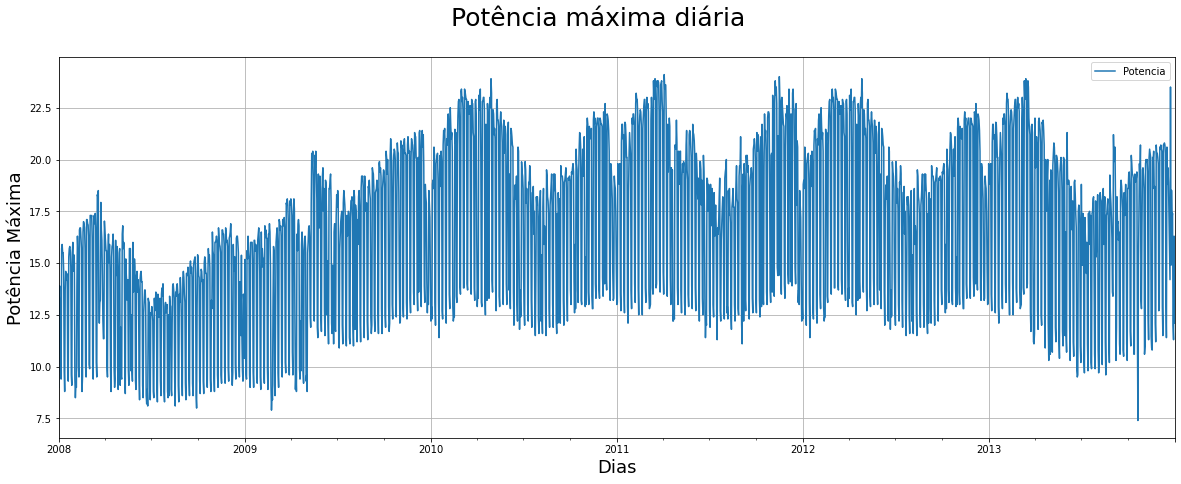

In [12]:
fig1, ax1 = plt.subplots(figsize=(20,7))
df_maxpot_dia.plot(ax=ax1) 


#título do plot
plt.suptitle('Potência máxima diária',size=25)

#determinando o nome dos eixos
ax1.set_xlabel('Dias',size=18)
ax1.set_ylabel('Potência Máxima',size=18)

plt.grid()
plt.show()

##### Não compreendi o porquê de aparecer somente os anos no eixo horizontal, o desejado seria aparecer os dias também?

### Gráfico da potência máxima semanal

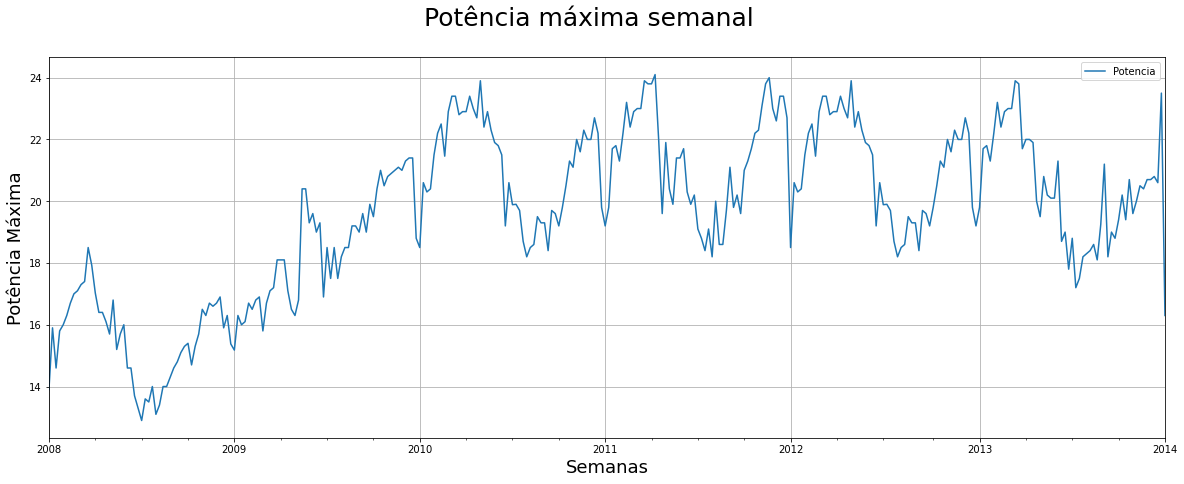

In [13]:
fig2 , ax2 = plt.subplots(figsize=(20,7))
df_maxpot_semana.plot(ax=ax2)


#título do plot
plt.suptitle('Potência máxima semanal',size=25)

#determinando o nome dos eixos
ax2.set_xlabel('Semanas',size=18)
ax2.set_ylabel('Potência Máxima',size=18)

plt.grid()
plt.show()

### Dataframe para a RNA

Esse dataframe é formado pelas entradas da RNA (a potência no momento k=0 até k=-4) e também pelas saídas esperadas (a potência no momento k=1 e k=2). 

#### DF semanal para RNA 

In [14]:
#definindo janela de previsão 
kdelay = 4
kprevision = 2

df_ksemanal = df_maxpot_semana 


#criando o dataframe com 
for i in range(1, kdelay+1):
  var_temp = df_maxpot_semana.shift(i).rename(columns={f"Potencia":\
                                                       f"Potencia(k-{i})"})
  df_ksemanal = pd.concat([var_temp, df_ksemanal],axis=1).dropna(axis=0)

for i in range(1, kprevision+1):
  var_temp = df_maxpot_semana.shift(-i).rename(columns={f"Potencia":\
                                                        f"Potencia(k+{i})"})
  df_ksemanal = pd.concat([df_ksemanal, var_temp],axis=1).dropna(axis=0)


df_ksemanal    


,Potencia(k-4),Potencia(k-3),Potencia(k-2),Potencia(k-1),Potencia,Potencia(k+1),Potencia(k+2)
Tempo,,,,,,,
2008-02-03,13.900000,15.900000,14.600000,15.800000,16.000000,16.299999,16.700001
2008-02-10,15.900000,14.600000,15.800000,16.000000,16.299999,16.700001,17.000000
2008-02-17,14.600000,15.800000,16.000000,16.299999,16.700001,17.000000,17.100000
2008-02-24,15.800000,16.000000,16.299999,16.700001,17.000000,17.100000,17.299999
2008-03-02,16.000000,16.299999,16.700001,17.000000,17.100000,17.299999,17.400000
...,...,...,...,...,...,...,...
2013-11-24,20.700001,19.600000,20.000000,20.500000,20.400000,20.700001,20.700001
2013-12-01,19.600000,20.000000,20.500000,20.400000,20.700001,20.700001,20.799999
2013-12-08,20.000000,20.500000,20.400000,20.700001,20.700001,20.799999,20.600000


#### DF diário para RNA

In [15]:
#janela
kdelayDia = 4
kprevisionDia = 2

df_kdiario = df_maxpot_dia

for i in range(1,kdelayDia+1):
  var_temp = df_maxpot_dia.shift(i).rename(columns={f"Potencia":\
                                                    f"Potencia(k-{i})"})
  df_kdiario = pd.concat([var_temp, df_kdiario], axis=1).dropna(axis=0)

for i in range(1, kprevisionDia+1):
  var_temp = df_maxpot_dia.shift(-i).rename(columns={f"Potencia":\
                                                     f"Potencia(k+{i})"})
  df_kdiario = pd.concat([df_kdiario, var_temp], axis=1).dropna(axis=0)


df_kdiario

,Potencia(k-4),Potencia(k-3),Potencia(k-2),Potencia(k-1),Potencia,Potencia(k+1),Potencia(k+2)
Tempo,,,,,,,
2008-01-05,9.000000,13.200000,13.900000,13.000000,9.800000,9.400000,15.700000
2008-01-06,13.200000,13.900000,13.000000,9.800000,9.400000,15.700000,15.900000
2008-01-07,13.900000,13.000000,9.800000,9.400000,15.700000,15.900000,15.500000
2008-01-08,13.000000,9.800000,9.400000,15.700000,15.900000,15.500000,15.500000
2008-01-09,9.800000,9.400000,15.700000,15.900000,15.500000,15.500000,14.600000
...,...,...,...,...,...,...,...
2013-12-25,15.800000,14.200000,23.500000,14.900000,18.513684,17.200001,17.400000
2013-12-26,14.200000,23.500000,14.900000,18.513684,17.200001,17.400000,12.000000
2013-12-27,23.500000,14.900000,18.513684,17.200001,17.400000,12.000000,11.300000


#### Salvando em meu drive

In [16]:
df_ksemanal.to_csv('/content/drive/MyDrive/Colab Notebooks/Pesquisa/main/potencia_max_ksemanal.csv')
df_kdiario.to_csv('/content/drive/MyDrive/Colab Notebooks/Pesquisa/main/potencia_max_kdiaria.csv')